## 1. Get the Data

### Download the Data

It is preferable to create some util functions to automate the process of downloading/extracting web-based data sets.

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates 'HOUSING_PATH', Downloads & Extracts the contents of 'HOUSING_URL' into 'HOUSING_PATH'
    
    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Now we download the data.

In [7]:
fetch_housing_data()

Let's write a small function to load the data using pandas.

In [8]:
import pandas as pd

In [9]:
def load_housing_data(housing_path=HOUSING_PATH):
    """ Loads housing data into pandas dataframe.
    
    #Arguments:
         housing_path: the path where 'housing.csv' exists
         
    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

Take a quick look at the data structure

In [10]:
housing = load_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district and has the following (10) attributes:
- `longitude`
- `latitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `median_house_value`
- `ocean_proximity`

The `info()` method is useful to take a quick look at the data. It answers the following questions:
- How many rows exist?
- How many `NaN`s per column?
- What are the data types (per column)?

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There exist $20,640$ instances (rows) in the dataset. Which means that it is fairly small data sample by machine learning standards.

$207$ districts are missing the `total_bedrooms` attribute, we will need to take care of this later.

On the other hand, all attributes are numerical, except `ocean_proximity`

Since we noticed repeated `ocean_proximity` values for the top 5 rows, we suspect that it is a categorical column, let's check it out:

In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We should be careful, because `.describe()` ignores null values. 

The `std` row shows standard deviation, which measures how dispersed the values are. The `25%`, `50%`, `75%` rows show the persentiles of each columns (Example: `25%` of districts have $<=18$ years housing median age).

Another way to get a feel of numerical continuous data is to draw a histogram for each numerical column:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

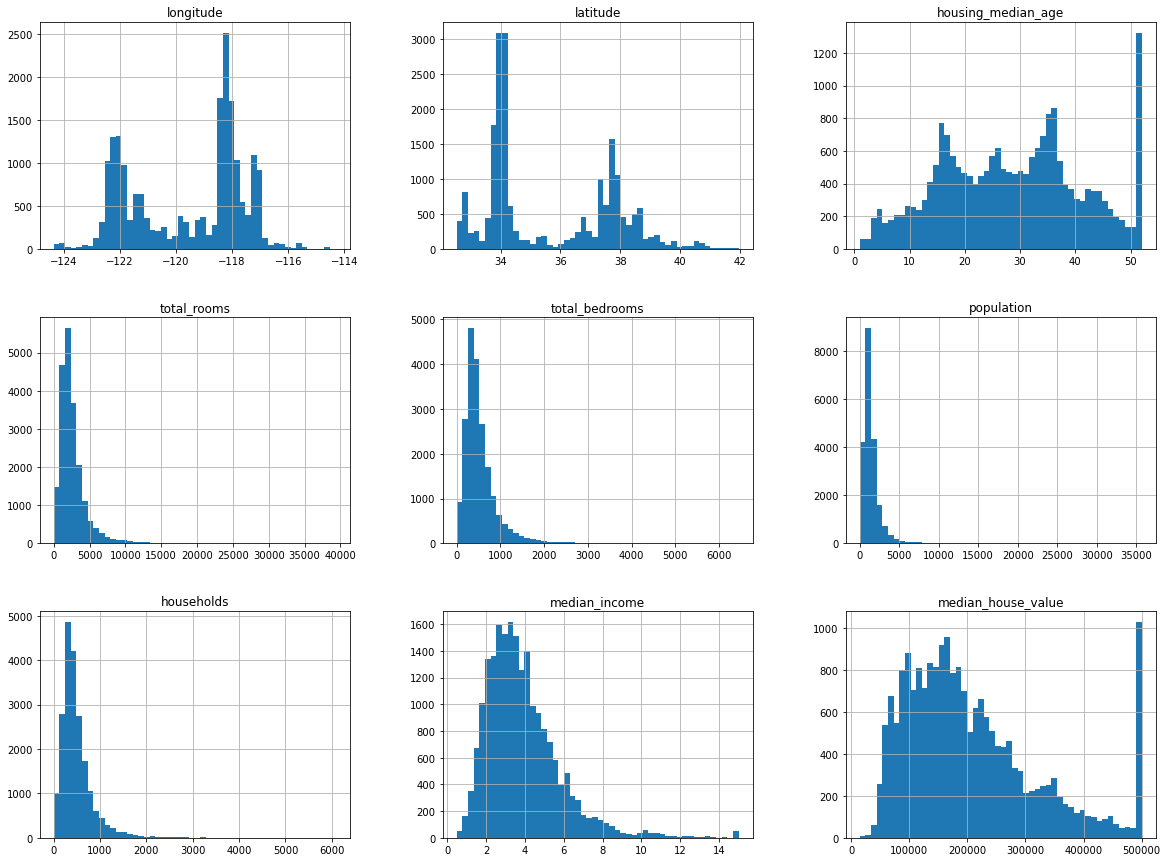

In [17]:
housing.hist(bins=50, figsize=(20,15))

We should be careful, because `.describe()` ignores null values. 

The `std` row shows standard deviation, which measures how dispersed the values are. The `25%`, `50%`, `75%` rows show the persentiles of each columns (Example: `25%` of districts have $<=18$ years housing median age).

Another way to get a feel of numerical continuous data is to draw a histogram for each numerical column:

### Create a Test Set

Creating a test set is easy, We randomly (or not if we're dealing with timeseries) select a subset of the data, typically 20% (or less if the dataset is large).

In [18]:
import numpy as np


In [20]:
def split_train_test(data, test_ratio=0.2):
    """Splits a dataset into train/test using a 'test_ratio'
    
    #Arguments:
        data, pd.DataFrame: the whole dataset
        test_ratio, float: the perecentage taken from the original dataset as a test set
    
    #Returns
        train, pd.DataFrame: the training set
        test, pd.DataFrame: the test set
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
# you can use the function like this
train_set, test_set = split_train_test(data=housing)
len(train_set), len(test_set)

(16512, 4128)

There is one issue though: if we run the program again, it will generate a different test set. Over time, our machine learning algorithm will get to see the whole dataset. Which is a thing that we want to avoid, test sets are created to be hidden from the algorithm/your eyeballs until you're done modeling. There are 2 possible solutions to this problem:
    
- Save the test set in the first run.
- Set the random `seed` before running `np.random.permutation`, in this way you're controlling the randomness of `numpy`.

But both solutions will break next time we upload an **updated** dataset. To have a stable train/test sets, a common solution is to use each instance's indentifier to decide whether to include it in the test set or not. Assuming the instances have a unique and ammutable identifier.

For example, we can compute a hash based on each instance's identifier then only allow (to the test set) hashes that are lower than 20% of the maximum hash value. This strategy is:

- Scalable: we will always have **20%** of the data in the test set.
- Extendable: when we have a bigger dataset, we only have to add new instances to the test set, both sets are stable.

Here is a possible implementation:

In [23]:
from zlib import crc32

In [24]:
def test_set_check(identifier, test_ratio=0.2):
    """Checks if an instance with 'identifier' should be in the test set of overall ratio 'test_ratio'
    
    # Arguments:
        identifier, int: the instance/row identifier (ex. row index from pd.DataFrame)
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set
        
    #Returns:
        in_test, bool: True if instance should be in the test set, False otherwise
        
    # Notes:
         - The CRC32 function converts a variable-length string into an 8-character string 
         that is a text representation of the hexadecimal value of a 32bit binary sequence.
    """
    total_size = 2**32
    hex_repr = crc32(np.int64(identifier)) & 0xffffffff
    in_test = hex_repr < (test_ratio * total_size)
    return in_test


In [25]:
[test_set_check(i) for i in range(10)]

[False, False, True, False, False, True, False, False, False, False]

In [26]:
def split_train_test_by_id(data, test_ratio, id_column):
    """Splits a dataframe using hash-based identification
    
    # Arguments:
        data, pd.DataFrame: the dataframe comprised of an id column and data of interest.
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
        id_column, string: column name with identifiers for each row.
    
    # Returns:
        train, pd.DataFrame: the train set.
        test, pd.DataFrame: the test set.
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately the housign dataset does not have an identifier column. We will use the row index as an identifier.

In [27]:
housing_with_id = housing.reset_index()

In [29]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column="index")
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

If we use the row index as an identifier, we will need to preserve the order at all costs by making sure new data gets appended to the end of the dataframe and no rows are deleted/altered. 

If the previous is not feasible, we can try to build an identifier from the multiple features of each row. For example: a (Latitude/longitude) couple is guaranteed to be stable a few million years, so we can build a unique index based on it. The following procedure creates a unique identifier for each row:

1. Convert latitude/longitude values from $\Bbb{R}$ to $\Bbb{Z}$ (by $\times 100$)
2. Convert latitude/longitude from $\Bbb{Z}$ to $\Bbb{N}$ using:

$$
f(n) =
\begin{cases}
2n,  & \text{if $n \ge 0$} \\
-2n-1, & \text{if $n \lt 0$}
\end{cases}
$$

3. Use `Cantor Pairing` function to create unique indexes from $\Bbb{N}^2$ tuples using:
$$\pi(k_{1},k_{2})={(k_{1}+k_{2})\cdot{(k_{1}+k_{2}+1)}\over{2}}+k_{2}$$

Let's implement it:

In [30]:
def from_Z_to_N(z):
    """Converts a number from \Bbb{Z} to \Bbb{N}
    
    # Arguments
        z, integer: in \Bbb{Z}
    
    # Returns
        n, natural number: in \Bbb{N}
    """
    if z >= 0:
        n = 2 * z
    else:
        n = -2 * z -1
    return n

In [35]:
def cantor_pairing(n1, n2):

    """Creates a unique number `n` in \Bbb{N} from a tuple (n1,n2) in \Bbb{N}^2
    
    # Arguments
        n1, natural number: first element of the tuple.
        n2, natural number: second element of the tuple.
    
    # Returns
        n, natural number: unique index from tuple (n1,n2).
    """

    n = ( ( (n1 + n2) * (n1 + n2 + 1) ) / 2) + n2
    return n

In [36]:
def lat_lon_to_index(lat, lon):
    """Converts a tuple of (lat,lon) to a unique index in \Bbb{N}
    
    # Arguments
        lat, float: latitude.
        lon, float: longitude.
    
    # Returns
        index, positive int: unique index.
    
    # Notes
        - 3 steps to do it:
            1. Convert (lat,lon) to \Bbb{Z} by *100.
            2. Convert (lat,lon) from \Bbb{Z} to \Bbb{N} using `from_Z_to_N()`
            3. Create the unique index using `cantor_pairing(_,_)`
    """
    lat, lon = int(lat*100), int(lon*100)
    lat, lon = from_Z_to_N(lat), from_Z_to_N(lon)
    index = cantor_pairing(lat, lon)
    return np.int64(index)

In [37]:
housing['id'] = housing.apply(lambda row: lat_lon_to_index(row['latitude'], row['longitude']), axis=1)

In [38]:
housing['id'].value_counts()

513289261    24
513481522    20
513417431    18
513353344    18
463609694    14
             ..
513032709     1
513417159     1
519523778     1
519459311     1
515855387     1
Name: id, Length: 11573, dtype: int64

We still get duplicate indexes, and at the same time, we have duplicate (lat,lon) tuples as follows:

In [39]:
housing.groupby(by=['longitude', 'latitude']).count()['total_rooms'].sort_values()

longitude  latitude
-124.35    40.54        1
-118.90    34.41        1
           35.26        1
           35.41        1
-118.89    34.22        1
                       ..
-122.41    37.75       10
-122.42    37.75       10
-122.44    37.78       11
-122.42    37.80       11
-122.41    37.80       15
Name: total_rooms, Length: 12590, dtype: int64

It's time to revert back to the book.

In [40]:
del(housing['id'])

In [41]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']

In [42]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column='id')
train_set.shape, test_set.shape

((16322, 12), (4318, 12))

`scikit-learn` provides multiple functions to split datasets in various ways. The simplest function is `train_test_split()`

Let's reproduce our implementation using sklearn's `train_test_split()`:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

So far, we have only considered purely random sampling methods. This is generally fine if our dataset is large enough. If it's not, however, we're running the chance of introducing a significant sampling bias.

When a survey company plans to interview 1,000 people, they don't pick them at random from a phone book. They make sure the `1,000` selected people are representative of the whole target population. this is called **stratified sampling**.

The population is divided into homogenuous subgroups called strata. Each stratum represents an instances percentage of the overall population. We want a test set to maintain the percentages of each stratum to make sure it's representative of the whole population. A purely random sampling method will introduce biases that are in favour of dominant groups/strata.

Suppose we've chatted with experts who told us that the `median income` attribute is a very important feature to predict `median_house_value`. We may want to ensure that the test set is representative of the overall `median income` distribution, that may be divided into categories. 

Most median income values are clustered around $\$15,000$ to $\$60,000$ but some median incomes go far beyond $6K$

It is important to have, for each stratum, a sufficient number of instances in your dataset. Or else, there might be a bias while assessing the stratum importance.

Let's use `pd.cut` to create the strata:

In [48]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

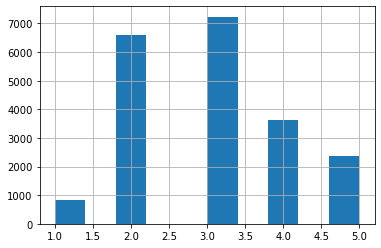

In [49]:
# visualize the categories
housing['income_cat'].hist()

Now we are ready to do stratified sampling based on income category.

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [53]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's check if this worked as expected, we can start by checking the proportions of income categries in the test set:

In [55]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Now that we have a test set that is representative of income_cat's distribution, it's time to remove it.

In [56]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## 2. Discover & Visualize the Data to Gain Insights

First, let's make sure we have put the test set aside, and you are only exploring the training set:

In [57]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

In [58]:
strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')

<ipython-input-58-044385fea95e>:1: FutureWarning: the 'fname'' keyword is deprecated, use 'path' instead
  strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')


ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [59]:
conda install pyarrow

^C

Note: you may need to restart the kernel to use updated packages.


Let's create a copy of the training set for us to play with it without harming the original one.

In [62]:
housing = strat_train_set.copy(); housing.shape

(16512, 10)

### Visualizing Geographical Data

Since there is latitude/longitude information, it's a good idea to use pandas' matplotlib plot method to visualize the districts of interest using `.plot()`

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

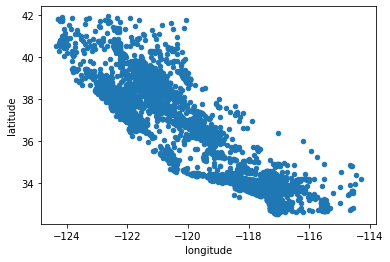

In [63]:
housing.plot(kind='scatter', x='longitude', y='latitude')

This looks like California, but other than that, we can't really see any other pattern. Setting the alpha to 0.1 makes it much easierto estimate densities:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

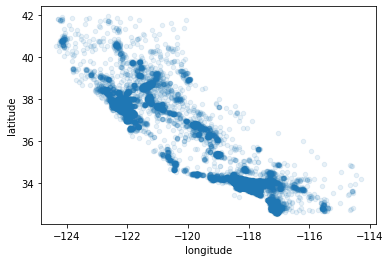

In [64]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Our brains are wired up to spot patterns in pictures, the tricky thing is that we have to play around with matplotlib's visualization parameters to make the patterns stand out.

In the following figure, the radius of each circle represents the district's population (option `s`). The color represents the price (option `c`). We will also use a pre-defined color map called **jet** (option `cmap`) which ranges from `blue` (low levels) to `red` (high level).

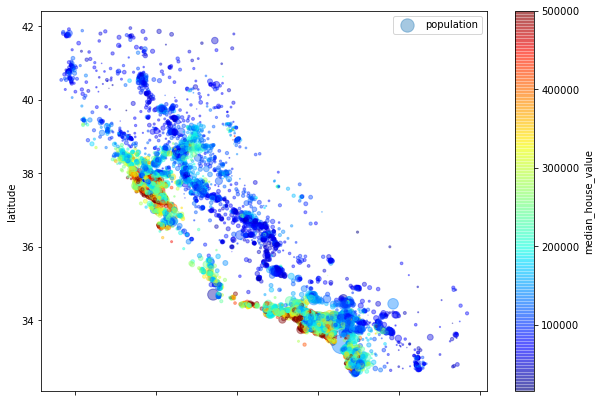

In [65]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100.,
            label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

This image tells us that the median housing price is related to location (closer to the sea -> more expensive). The relation between `population` and `price` isn't that obvious, let's check it out:

In [66]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.00000,-0.02692
median_house_value,-0.02692,1.00000


A very weak pair-wise correlation between price and population. We leave it at that & we continue with the book.

### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient of every pair of columns:

In [67]:
corr_matrix = housing.corr()

Now let's look at how much each attribute correlates with `house_median_value`:

In [68]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient is $\in [-1,1]$. When the coefficient is close to `1` it means there exist a strong positive correlation between the two variables (For example. the median house value tends to go up with the median average income goes up). When the coefficient is close to `-1` it means there exist a strong negative correlation between the two variables. When the coefficient is close to `0` it means that there is a weak correlation between the two variables.

The following figure shows multiple bi-variate plots and their corresponding correlation coefficient:

<div style="text-align:center;"><img style="width:50%" src="static/imgs/corr_examples.png" /></div>

The correlation coefficients only measure linear correlations (if `X` goes up, `Y` goes up/down) and it has nothing to do with the slope. 

Another way to look at correlations is to use the Pandas `.scatter_matrix()` method to visualize correlations between any 2 attributes. Since we have `11` attributes and we cannot fit all plots, let's focus on the few promising ones.

In [69]:
from pandas.plotting import scatter_matrix

In [74]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

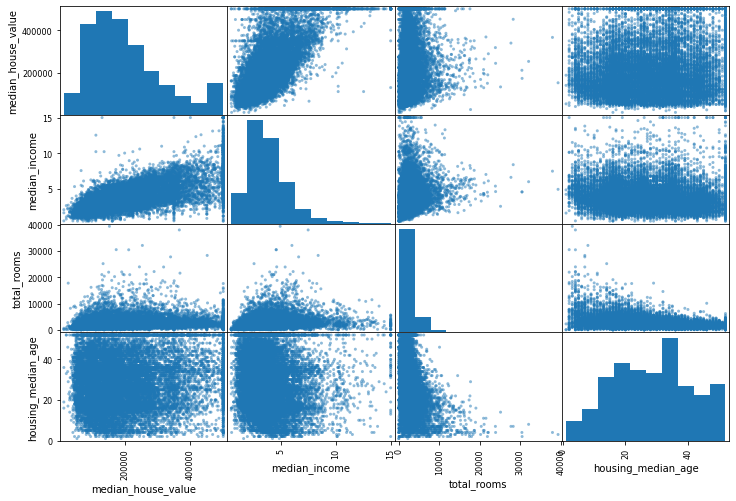

In [75]:
scatter_matrix(frame=housing[attributes], figsize=(12,8))

The most interesting attribute to predict `median_house_value` is `median_income`

Let's zoom in the correlation scatterplot:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

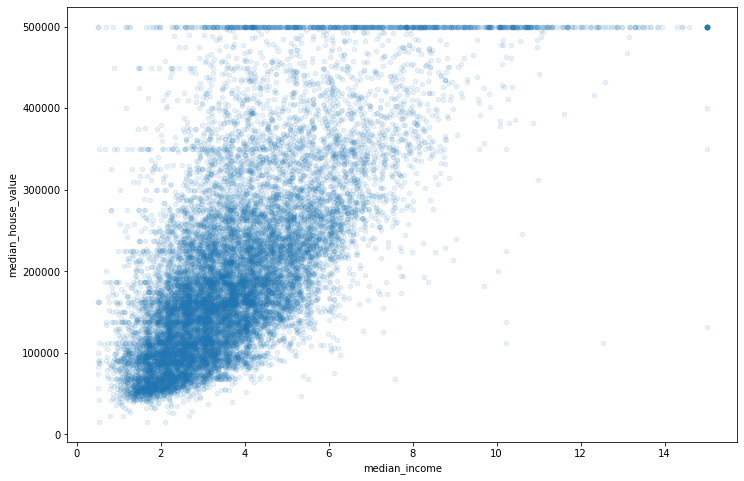

In [76]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)

This correlation is indeed very strong, we can clearly see the upward trend

The price cap that we noticed earlier is clearly visible at $500,000$USD, but the plot reveals other less obvious lines at:
    - USD450K
    - USD350K
    - USD280K
    - ...

We may want to remove the corresponding districts so that the model to not learn these quirks.

### Experimenting with Attribute Combinations

We may want to transform tail heavy distributions using the logarithm function ($log(.)$).

One last thing we would want to do before feeding the data into an ML algorithm is to try to combine features. Examples:
- The number of rooms per household, not the total number of rooms in a district.
- The total number of bedrooms isn't helpful either, we want to compare it with the number of rooms.
- The number of poeple per household is also an interesting feature to look at.

Let's create them all:

In [77]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

Let's look at the correlation matrix again:

In [78]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We notice that `bedrooms_per_room` is much more correlated with `median_house_value`. meaning that the more expensive the house, the less the `bedrooms per room` ratio. `rooms_per_household` have a moderate positive correlation with `median_house_value`, the more expensive a house is, the more rooms it will have.

We don't have to go through every correlation/engineered feature, the goal is to start at the right place.

Data science is an **iterative** process, once we have a model up and running, we can analyze its outputs and go back to this step to explore the data again.

## 3. Prepare the Data for Machine Learning Algorithms

Instead of doing this manually, we should write functions for this purpose. We mention the following reasons:

- It will allow us to reproduce the transformations on any fresh dataset.
- We will gradually build a library of transformations that we can use in future projects.
- We can use these functions in our live systems to transform the data using a pipeline before feeding it into the algorithm.
- This will make it possible for us to try various transformations or a combination of them to check what works best.

Let's start with a fresh dataset again:

In [81]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
housing.shape, housing_labels.shape

((16512, 9), (16512,))

### Data Cleaning

Most machine learning algorithms cannot deal with missing features, so let's create a few functions to deal with them.

We saw earlier that `total_bedrooms` have missing values, we have 3 options:
1. Get rid of the corresponding districts
    - `housing.dropna(subset='total_bedrooms')`
2. Get rid of the whole attribute (feature)
    - `housing.drop('total_bedrooms', axis=1)`
3. Set the missing values to some value (zero, mean, median, regressor preds,...)
    - `median = housing['total_bedrooms'].median()`
    - `housing['total_bedrooms'].fillna(median, inplace=True)`
    
We can also use `scikit-learn`'s `SimpleImputer`:

In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(strategy='median')

Since the imputer can only work on numerical attributes, we need to create a copy of the dataframe without the OCEAN_PROXIMITY text attribute:

In [84]:
housing_num = housing.drop('ocean_proximity', axis=1)

Now we can just fit the imputer to the dataframe.

In [85]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has calculated the median of all attributes and stored them in `.statistics_`.

In [87]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [88]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now we can use the "trained or fitted" imputer to transform the numerical attributes by replacing missing values with their corresponding medians:

In [89]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

 Scikit-learn's API is remarkably [well designed](https://arxiv.org/abs/1309.0238). These are its main design principles:
- Consistency: all objects share a consistent and simple interface
    - `Estimators`: Any object that can estimate some parameters based on a dataset is called an estimator.
    - `Transformers`: Some estimators can also transform a dataset (like imputer), these are called transformers.
    - `Predictors`: Finally, some estimators, when given a dataset, are able to export predictions, these are called predictors.
- Inspection: All the estimators parameters/hyperparameters are accessible directly through public variables.
- Non-proliferation of classes: Datasets are represented as Numpy arrays or Scipy sparse matrices, no home-made data types.
- Composition: existing building blocks are re-used as much as possible.
- Sensible defaults: Scikit-learn provide reasonable default values for most hyper-parameters, making it easy to create good baseline estimators.

### Handling Text & Categorical Attributes

So far, we have only dealt with numerical attributes, now, let's check text/categorical attributes. 

We have only 1 categorical attribute, which is `ocean_proximity`. let's look at its values for the 10 first instances:

In [90]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


There is a limited number of values, each of which represents a category:

In [91]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

Most ML algorithms prefer to work with numbers, so let's convert the text into ordinal categorical numbers:

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
ordinal_encoder = OrdinalEncoder()

In [94]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape

(16512, 1)

In [95]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

We can get a list of categories using the catergories_ attribute of the OrdinalEncoder:

In [96]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that the encoder will assume that two nearby categories are more similar than distant ones, but this is not the case for us (ex. categories 0 and 4 are clearly more similar than 0 and 1). To fix this issue, we create one binary attribute per category:
- One attribute is equal to `1` if the category is equal to `<1H OCEAN` and `0` otherwise.
- One attribute is equal to `1` if the category is equal to `INLAND` and `0` otherwise.
- ...

This is called 1-hot encoding because, for any row, only one binary attribute will be equal to 1 (hot), while the others are 0s (cold).

The new attributes are sometimes called dummy attributes, let's create them:

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
one_hot_encoder = OneHotEncoder()

In [99]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a sparse scipy matrix instead of a numpy array. If we use numpy, we have to store all of the zeros in memory, comprising of most of the array. Instead, we store the information as a Scipy sparse matrix which only stores the locations of the non-zeros (which is more efficient).

We can mostly use it as a normal `2D` array, but if we want to convert it into a dense numpy array:

In [100]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [101]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical feature has a large number of possible values (ex. country, postcode, city, ...) then a 1-hot encoder will result in a large number of input features. This may slow down training and degrade performance.

We may want to replace the categorical inputs with numerical features that relate to the categorical values. Examples:
- Replace country with its GDP/Area/Population
- Replace `ocean_proximity` with `distance_to_ocean`.

Alternatively, we could replace the categorical features with low-dimensional learnable vectors called embeddings. Each category's representation would be learned during training. This is part of what's called "representation learning" or "deep learning".

### Custom Transformers

Although `scikit-learn` provide many useful transformers, we will need to write our own for custom tasks such as data cleanup or feature engineering. We'll want our transformer to easily work with other scikit-learn functionalities (such as Pipelines).

All we need to do is create a class with 3 methods: `fit`, `transform`, `fit_transform`. We can get `fit_transform` for free by adding `TransformerMixin` as a base class.

If we add `BaseEstimator` as another base class & avoid the use of *args* and *kwargs*, we get two extra methods (`.get_params()` & `.set_params()`). 

For example, here is a small transformer that adds the combined attributes discussed earlier:

In [102]:
from sklearn.base import TransformerMixin, BaseEstimator

In [103]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [107]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """Engineers new features from existing ones: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`
    
    # Arguments:
        add_bedrooms_per_room, bool: defaults to True. Indicates if we want to add the feature `bedrooms_per_room`.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # We don't have any internal parameters. Only interested in transforming data
        
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [108]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [109]:
housing_extra_attribs = attr_adder.transform(housing.values)

The `add_bedrooms_per_room` hyper-parameter will easily help us find out whether adding the attributes helps the ML algorithm or not.

We can add hyper-parameters to control any pre-processing step that we're not sure about. The more we automate these data preprocessing steps, the more combinations we get to try out.

We will more likely find a great combination of steps that maximizes performance (and will save us a ton of time).

### Feature Scaling

With few exceptions, ML algorithms don't perform well on data features that have different scales. However, scaling the target value is generally not required.

There are two ways to get all features to have the same scale:
- `Min-Max` scaling: for each value, we subtract by the `min` and divide by `max - min`.
- `Standarization`: For each value, we subtract the `mean` and divide by `std`

Standardization produce values with a mean of `0` and a standard deviation of `1`. Unlike Min-Max scaling, standardization doesn't bound values to a specific range. This can cause problems for some ML algorithms (Example: NNs usually expect inputs range from 0 to 1). However, standarization is much less effected by outliers.

As with all transformers, It's important to fit to the training data only, not the full dataset.

### Transformation Pipelines

There are many transformation steps that need to be executed in the right order. Scikit-learn provides the `Pipeline` class to help us chain transformations in a sequence.

Here is a small pipeline for the numerical attribtues:

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [111]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [113]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

So far, we have handeled categorical/continuous columns separately. It would be better if we had a single transformer that is able to transform all columns.

`ColumnTransformer`s to the rescue: 

In [114]:
from sklearn.compose import ColumnTransformer

In [115]:
num_attribs = housing_num.columns.tolist()
cat_attribs = ['ocean_proximity']

In [116]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [117]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

**That's it!**, we have a pre-processing pipeline that takes the data and transforms it into data that we can feed to an ML algorithm.

## 4. Select & Train a Model

We are now ready to select & train an ML model.

### Training & Evaluating on the Training Set

Thanks to all the previous steps, things are going to be much simpler from now on.

Let's first train a Linear Regression model, like we did in the previous chapter:

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lin_reg = LinearRegression()

In [120]:
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression()

Let's try the modelon a few instances form the training set.

In [122]:
some_data = housing.iloc[:5]

In [123]:
some_labels =housing_labels.iloc[:5]

In [124]:
some_data_prepared = full_pipeline.transform(some_data)

In [125]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [126]:
print("Labels: ", some_labels.tolist())

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, although the predictions are not exactly accurate.

Let's measure the performance of our model using the RMSE metric.

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
housing_predictions = lin_reg.predict(housing_prepared)

In [129]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [130]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

Most districts median housing values range between 120K to 265K, so an average error of 68K is not good.

This is an example of a model overfitting the data. When this happens, it can mean two things:
- The features do not provide enough information to make better predictions.
- The model is not powerful enough, meaning its hypothesis space is narrow.

The main ways to tackle underfitting:
- To feed the model better features.
- To select a more powerful model.
- To loosen the model's restrictions.

This model is not regularized, which rules out the last option. We could try to input more features, but let's start by testing a more powerful model.

Let's try out `DecisionTreeRegressor`, this is a powerful model, capable of finding non-linear relationships within the data:

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
tree_reg = DecisionTreeRegressor()

In [133]:
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor()

Now that the model is trained, let's evaluate its performance on the training set.

In [134]:
housing_predictions = tree_reg.predict(housing_prepared)

In [135]:
tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)

In [136]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It is either the model is absolutely perfect, or it badly overfit the data. 

As we know, we shouldn't touch the test set until we are ready for deployment. The solution is to partition the training data itself and extract a validation set.

### Better Evaluation using Cross-Validation

One way to evaluate our model is to use `train_test_split()` again on the training set, extract a validation set and evaluate our iterative models on it.

A great alternative is to use K-fold cross-validation. We randomly split the training data into 10 folds, we iteratively train the model on 9 folds and evaluate on 1, doing this 10 times.

We will endup with `10` metric scores:

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
scores = cross_val_score(estimator=tree_reg, X=housing_prepared,
                        y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [139]:
tree_rmse_scores = np.sqrt(-scores)

`scikit-learn`'s cross validation features expect a utility function (the greater the better) rather than a cost function (the lower the better). That's why we used `ned_mean_squared_error` and we negated it at RMSE evaluation

Let's look at the results:

In [140]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.
    
    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [141]:
display_scores(tree_rmse_scores)

Scores:  [68835.6972078  66050.63048397 69974.78297134 69457.84988145
 71722.66837012 74064.28683116 71226.27645199 70888.1890531
 74794.21004496 68482.47372631]
Mean:  70549.70650221976
Standard Deviation:  2475.7199814682704


The decision tree seems to perform worse than the linear regression model!

We should notice that cross validation allows us to not only get an estimate of the performance of your model (mean), but how precise it is (std). We would not have this estimation if we used only one validation set. However, cross-validation comes at the cost of training the model several times, which is not always possible.

Let's compute the same scores for the linear regression model just to be sure:

In [143]:
scores = cross_val_score(estimator=lin_reg, X=housing_prepared,
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [144]:
lin_rmse_scores = np.sqrt(-scores)

In [145]:
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.6740017983484


That's right! the decision tree model is overfitting so badly that it performs worse than the linear regression model.

Let's try one last model now, the random forest regressor. Random forests work by training many decision trees on random feature subsets then average out their predictions.

Building a model on top of many other models is called **Ensemble Learning**.

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
forest_reg = RandomForestRegressor()

In [153]:
forest_reg.fit(X=housing_prepared, y=housing_labels)

RandomForestRegressor()

In [154]:
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=forest_reg.predict(X=housing_prepared))

In [155]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18787.608214525404

In [156]:
scores = cross_val_score(estimator=forest_reg, X=housing_prepared,
                        y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [157]:
forest_rmse_scores = np.sqrt(-scores)

In [158]:
display_scores(scores=forest_rmse_scores)

Scores:  [49401.50253126 47489.6987807  49712.44456034 52226.89941849
 49877.79123811 53524.59721074 49039.78916975 48056.73256022
 53582.00347479 50269.96339856]
Mean:  50318.14223429705
Standard Deviation:  2018.1446568722547


This is much better, random forests seem very promising. We should notice, however, that the RMSE on the training set is still much lower then the validation RMSE, meaning the model overfitted, but not as badly as the decision tree model. Possible solutions to overfitting are:
- Getting more training data
- Simplifying the model
- Regularizing the model

We should save any model after training so that we can come back to it at any time you want. We make sure to save both the hyper-parameters and the parameters (weights) of the model. We can easily save scikit-learn models using Python's `joblib`:

In [159]:
import joblib

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining dask-core:  50%|#####     | 161/322 [06:47<02:12,  1.21it/s]  


Examining astropy: 100%|##########| 322/322 [16:07<00:00,  2.49s/it]
                                                                    

Determining conflicts:   0%|          | 0/322 [00:00<?, ?it/s]
Examining conflict for nbconvert spyder jupyterlab jupyterlab_server jupyter_console flake8 entrypoints anaconda qtconsole keyring jupyter_client nbclient notebook python-language-server jupyter spyder-kernels ipykernel:   0%|          | 0/322 [00:00<?, ?it/s]
Examining conflict for entrypoints mpmath defusedxml glob2 isort keyring toolz bcrypt numpy-base clyent python werkzeug imagesize lxml pyreadline backports.tempfile xmltodict cython cytoolz jupyter_client toml pycparser dask imutils mkl-service pytables pickleshare fastcache dask-core qtconsole iniconfig xlsxwriter greenlet pydocstyle spyder-kernels distributed sphinx seaborn numexpr torchvision numba lazy-object-proxy wcwidth regex contextlib2 pyyaml pycosat filelock pathtools babel pysocks pyparsing urllib3 pillow locket pkginfo 

Examining conflict for xmltodict anaconda-navigator:  10%|9         | 31/322 [35:21<2:15:10, 27.87s/it]
Examining conflict for xmltodict anaconda-navigator:  10%|9         | 32/322 [35:21<2:06:44, 26.22s/it]
Examining conflict for anaconda pynacl pytorch bcrypt cryptography gevent cffi argon2-cffi brotlipy pycparser:  10%|9         | 32/322 [35:21<2:06:44, 26.22s/it]
Examining conflict for sympy anaconda fastcache:  11%|#         | 35/322 [35:52<1:16:20, 15.96s/it]
Examining conflict for anaconda libarchive conda conda-package-handling conda-verify conda-build python-libarchive-c:  11%|#         | 35/322 [36:16<1:16:20, 15.96s/it]
Examining conflict for anaconda libarchive conda conda-package-handling conda-verify conda-build python-libarchive-c:  11%|#1        | 36/322 [36:16<1:25:47, 18.00s/it]
Examining conflict for anaconda libarchive conda-package-handling lzo conda-build python-libarchive-c pytables:  11%|#1        | 36/322 [36:43<1:25:47, 18.00s/it]      
Examining conflict for 

Examining conflict for spyder sphinxcontrib-jsmath anaconda numpydoc sphinx:  55%|#####5    | 178/322 [2:01:33<1:01:24, 25.59s/it]
Examining conflict for spyder sphinxcontrib-jsmath anaconda numpydoc sphinx:  56%|#####5    | 179/322 [2:01:33<1:03:15, 26.54s/it]
Examining conflict for spyder yapf python-language-server anaconda:  56%|#####5    | 179/322 [2:02:00<1:03:15, 26.54s/it]         
Examining conflict for spyder yapf python-language-server anaconda:  56%|#####5    | 180/322 [2:02:00<1:03:13, 26.71s/it]
Examining conflict for spyder anaconda sphinxcontrib-devhelp numpydoc sphinx:  56%|#####5    | 180/322 [2:02:22<1:03:13, 26.71s/it]
Examining conflict for spyder anaconda sphinxcontrib-devhelp numpydoc sphinx:  56%|#####6    | 181/322 [2:02:22<59:18, 25.24s/it]  
Examining conflict for nbconvert spyder pandoc anaconda notebook jupyter:  56%|#####6    | 181/322 [2:02:43<59:18, 25.24s/it]    
Examining conflict for nbconvert spyder pandoc anaconda notebook jupyter:  57%|#####6    | 

Examining conflict for ipywidgets jupyter _ipyw_jlab_nb_ext_conf: : 331it [3:00:52, 21.44s/it]         
Examining conflict for ipywidgets jupyter _ipyw_jlab_nb_ext_conf: : 332it [3:00:52, 23.63s/it]
Examining conflict for conda conda-build pycosat anaconda: : 332it [3:00:53, 23.63s/it]       
Examining conflict for conda conda-build pycosat anaconda: : 333it [3:00:53, 16.82s/it]
Examining conflict for conda conda-build menuinst anaconda: : 333it [3:01:27, 16.82s/it]
Examining conflict for conda conda-build menuinst anaconda: : 334it [3:01:27, 21.77s/it]
Examining conflict for py-lief conda-build anaconda: : 334it [3:01:56, 21.77s/it]       
Examining conflict for py-lief conda-build anaconda: : 335it [3:01:56, 23.98s/it]
Examining conflict for powershell_shortcut anaconda: : 335it [3:02:26, 23.98s/it]
Examining conflict for powershell_shortcut anaconda: : 336it [3:02:26, 25.88s/it]
Examining conflict for seaborn statsmodels anaconda: : 336it [3:02:26, 25.88s/it]
Examining conflict for 

singledispatch -> python -> ca-certificates
certifi -> python -> ca-certificates
pexpect -> python -> ca-certificates
beautifulsoup4 -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
qtawesome -> python -> ca-certificates
libarchive -> openssl[version='>=1.1.1f,<1.1.2a'] -> ca-certificates
prometheus_client -> python -> ca-certificates
bcrypt -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
glob2 -> python -> ca-certificates
pytz -> python -> ca-certificates
webencodings -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
joblib -> python -> ca-certificates
jupyter_console -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
spyder -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
zope.interface -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
console_shortcut -> python -> ca-certificates
backports -> python -> ca-certificates
mock -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
flake8 -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
bottleneck -

winpty -> vc=14
py -> python[version='>=2.7'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
cryptography -> vc[version='14.*|9.*|>=14.1,<15.0a0']
zict -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
tifffile -> numpy[version='>=1.15.1'] -> vc[version='14.*|9.*']
conda-package-handling -> python[version='>=3.6,<3.7.0a0'] -> vc=14
wincertstore -> python[version='>=3.7,<3.8.0a0'] -> vc[version='14.*|9.*']
llvmlite -> vc[version='14.*|9.*|>=14.1,<15.0a0']
werkzeug -> python[version='>=3.6'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
anaconda-navigator -> pillow -> vc[version='14.*|9.*|>=14.1,<15.0a0']
python=3.8 -> vc[version='>=14.1,<15.0a0']
freetype -> vc[version='14.*|9.*|>=14.1,<15.0a0']
unicodecsv -> python[version='>=3.9,<3.10.0a0'] -> vc[version='14.*|>=14.1,<15.0a0|9.*']
backports.functools_lru_cache -> python -> vc[version='14.*|>=14.1,<15.0a0|9.*']
pywinpty -> vc[version='14.*|9.*']
wrapt -> vc[version='14.*|9.*|>=14.1,<15.0a0']
xlsxwriter -> python -> vc[version='14.*|>=14.1,<15.0a

backports.tempfile -> python -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.35.4,<4.0a0|>=3.36.0,<4.0a0|>=3.35.1,<4.0a0']
bitarray -> python[version='>=3.7,<3.8.0a0'] -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.33.0,<4.0a0|>=3.36.0,<4.0a0|>=3.35.1,<4.0a0|>=3.35.4,<4.0a0|>=3.32.3,<4.0a0|>=3.30.0,<4.0a0']
python-dateutil -> python -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.35.4,<4.0a0|>=3.36.0,<4.0a0|>=3.35.1,<4.0a0']
pexpect -> python -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.35.4,<4.0a0|

intervaltree -> python -> tzdata
nbformat -> python[version='>=3.5'] -> tzdata
astroid -> python[version='>=3.9,<3.10.0a0'] -> tzdata
sphinxcontrib-websupport -> python -> tzdata
matplotlib-base -> python[version='>=3.9,<3.10.0a0'] -> tzdata
conda-verify -> python -> tzdata
pycurl -> python[version='>=3.9,<3.10.0a0'] -> tzdata
imageio -> python[version='>=3'] -> tzdata
anaconda-project -> python[version='>=2.7'] -> tzdata
mpmath -> python[version='>=3.9,<3.10.0a0'] -> tzdata
prompt-toolkit -> python -> tzdata
zict -> python -> tzdata
jupyter_core -> python[version='>=3.9,<3.10.0a0'] -> tzdata
backports.tempfile -> python -> tzdata
astropy -> python[version='>=3.9,<3.10.0a0'] -> tzdata
sphinxcontrib -> python[version='>=3.9,<3.10.0a0'] -> tzdata
wrapt -> python[version='>=3.9,<3.10.0a0'] -> tzdata
unicodecsv -> python[version='>=3.9,<3.10.0a0'] -> tzdata
xlrd -> python -> tzdata
jupyterlab -> python[version='>=3.6'] -> tzdata
pluggy -> python[version='>=3.9,<3.10.0a0'] -> tzdata
pycpars

hdf5 -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
libspatialindex -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
_ipyw_jlab_nb_ext_conf -> python[version='>=3.9,<3.10.0a0'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
py-lief -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
unicodecsv -> python[version='>=3.9,<3.10.0a0'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
pyyaml -> vc[version='>=14.1,<15.0a0'] -> vs2015_runtime[version='>=14.0.25123,<15.0a0|>=14.0.25420|>=14.15.26706|>=14.27.29016|>=14.16.27012']
joblib -> python[version='>=3.6'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
packaging -> python[version='>=3.6'] -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
zict -> python -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
scikit-learn -> vs2015_runtime[version='>=14.16.27012,<15.0a0']
markupsafe -> vc[version='>=14.1,<15.0a0'] -> vs2015_runtime[version='>=14.0.25123,<15.0a0|>=14.0.25420|>=14.15.26706|>=14.27.29016|>=14.16.27012']
fastcache -> 

console_shortcut -> python -> tk[version='>=8.6.11,<8.7.0a0']
krb5 -> tk[version='8.6.*|>=8.6.7,<8.7.0a0|>=8.6.8,<8.7.0a0']
packaging -> python[version='>=3.6'] -> tk[version='>=8.6.11,<8.7.0a0']
qtawesome -> python[version='>=3.6'] -> tk[version='>=8.6.11,<8.7.0a0']
backports.weakref -> python -> tk[version='>=8.6.11,<8.7.0a0']
tqdm -> python[version='>=2.7'] -> tk[version='>=8.6.11,<8.7.0a0']
wincertstore -> python[version='>=3.10,<3.11.0a0'] -> tk[version='>=8.6.11,<8.7.0a0']
prompt_toolkit -> python[version='>=3.6'] -> tk[version='>=8.6.11,<8.7.0a0']
toml -> python[version='>=2.7'] -> tk[version='>=8.6.11,<8.7.0a0']
path.py -> python[version='>=3.5'] -> tk[version='>=8.6.11,<8.7.0a0']
certifi -> python[version='>=3.10,<3.11.0a0'] -> tk[version='>=8.6.11,<8.7.0a0']
sphinxcontrib-qthelp -> python[version='>=3.5'] -> tk[version='>=8.6.11,<8.7.0a0']
sortedcollections -> python -> tk[version='>=8.6.11,<8.7.0a0']
idna -> python[version='>=3.5'] -> tk[version='>=8.6.11,<8.7.0a0']
requests

notebook -> jupyter_client[version='>=5.3.4'] -> entrypoints[version='>=0.2.2']
flake8 -> entrypoints[version='>=0.3.0,<0.4.0']
jupyterlab_server -> entrypoints[version='>=0.2.2']
nbconvert -> entrypoints[version='>=0.2.2']
jupyter_client -> entrypoints
spyder -> keyring[version='>=17.0.0'] -> entrypoints[version='>=0.2.2']
anaconda==2020.11 -> nbconvert==6.0.7=py37_0 -> entrypoints[version='>=0.2.2']
ipykernel -> jupyter_client[version='<8.0'] -> entrypoints
nbclient -> jupyter_client[version='>=6.1.5'] -> entrypoints
qtconsole -> jupyter_client[version='>=4.1'] -> entrypoints
keyring -> entrypoints
nbconvert -> jupyter_client[version='>=4.2'] -> entrypoints
jupyterlab -> jupyterlab_server[version='>=2.3,<3'] -> entrypoints[version='>=0.2.2']
python-language-server -> flake8 -> entrypoints[version='>=0.3.0,<0.4.0']
anaconda==2020.11 -> entrypoints==0.3[build='py37_0|py38_0']

Package jupyter_client conflicts for:
ipywidgets -> ipykernel[version='>=4.5.1'] -> jupyter_client[version='<8

notebook -> nbconvert -> pandocfilters[version='>=1.4.1']
anaconda==2020.11 -> pandocfilters==1.4.3[build='py37haa95532_1|py38haa95532_1']
spyder -> nbconvert[version='>=4.0'] -> pandocfilters[version='>=1.4.1']
anaconda==2020.11 -> nbconvert==6.0.7=py37_0 -> pandocfilters[version='>=1.4.1']
jupyter -> nbconvert -> pandocfilters[version='>=1.4.1']
nbconvert -> pandocfilters[version='>=1.4.1']

Package jsonschema conflicts for:
notebook -> nbformat -> jsonschema[version='>=2.4,!=2.5.0']
anaconda-client -> nbformat[version='>=4.4.0'] -> jsonschema[version='>=2.4,!=2.5.0']
nbclient -> nbformat[version='>=5.0'] -> jsonschema[version='>=2.4,!=2.5.0']
anaconda==2020.11 -> jsonschema==3.2.0=py_2
jupyterlab -> jupyterlab_server[version='>=2.3,<3'] -> jsonschema[version='>=3.0.1']
jupyterlab_server -> jsonschema[version='>=3.0.1']
ipywidgets -> nbformat[version='>=4.2.0'] -> jsonschema[version='>=2.4,!=2.5.0']
nbformat -> jsonschema[version='>=2.4,!=2.5.0']
spyder -> jsonschema[version='>=3.2.0

jupyter_console -> ipython -> backports.shutil_get_terminal_size
jupyterlab -> ipython -> backports.shutil_get_terminal_size
ipywidgets -> ipython[version='>=4.0.0'] -> backports.shutil_get_terminal_size
anaconda==2020.11 -> backports.shutil_get_terminal_size==1.0.0[build='py38_2|py37_2']
ipython -> backports.shutil_get_terminal_size

Package cffi conflicts for:
cryptography -> cffi[version='!=1.11.3,>=1.8|>=1.12|>=1.8|>=1.7']
urllib3 -> brotlipy[version='>=0.6.0'] -> cffi[version='!=1.11.3,>=1.8|>=1.0.0|>=1.12|>=1.8|>=1.7']
anaconda==2020.11 -> argon2-cffi==20.1.0=py37he774522_1 -> cffi[version='!=1.11.3,>=1.8|>=1.0.0|>=1.1|>=1.11.5|>=1.4.1']
paramiko -> bcrypt[version='>=3.1.3'] -> cffi[version='!=1.11.3,>=1.8|>=1.1|>=1.12|>=1.8|>=1.7|>=1.4.1']
notebook -> argon2-cffi -> cffi[version='>=1.0.0']
pyopenssl -> cryptography[version='>=2.8'] -> cffi[version='!=1.11.3,>=1.8|>=1.12|>=1.8|>=1.7']
anaconda==2020.11 -> cffi==1.14.3[build='py37h7a1dbc1_0|py38h7a1dbc1_0']
pytorch -> cffi
bcrypt 

notebook -> nbconvert -> pandoc[version='>=1.12.1|>=1.12.1,<2.0.0']
spyder -> nbconvert[version='>=4.0'] -> pandoc[version='>=1.12.1|>=1.12.1,<2.0.0']
jupyter -> nbconvert -> pandoc[version='>=1.12.1|>=1.12.1,<2.0.0']
anaconda==2020.11 -> nbconvert==6.0.7=py37_0 -> pandoc[version='>=1.12.1']
nbconvert -> pandoc[version='>=1.12.1|>=1.12.1,<2.0.0']
anaconda==2020.11 -> pandoc==2.11=h9490d1a_0

Package backports_abc conflicts for:
jupyterlab -> tornado[version='!=6.0.0,!=6.0.1,!=6.0.2'] -> backports_abc[version='>=0.4']
matplotlib-base -> tornado -> backports_abc[version='>=0.4']
tornado -> backports_abc[version='>=0.4']
ipykernel -> tornado[version='>=4.2,<7.0'] -> backports_abc[version='>=0.4']
distributed -> tornado[version='>=5'] -> backports_abc[version='>=0.4']
jupyter_client -> tornado[version='>=4.1'] -> backports_abc[version='>=0.4']
bokeh -> tornado[version='>=5.1'] -> backports_abc[version='>=0.4']
notebook -> tornado[version='>=5.0'] -> backports_abc[version='>=0.4']
anaconda-

anaconda==2020.11 -> distributed==2.30.1=py37haa95532_0 -> sortedcontainers[version='!=2.0.0,!=2.0.1|>=2.0']
intervaltree -> sortedcontainers
anaconda==2020.11 -> sortedcontainers==2.2.2=py_0
attrs -> hypothesis -> sortedcontainers[version='>=2.1.0,<3.0.0']
distributed -> sortedcontainers[version='!=2.0.0,!=2.0.1']

Package pysocks conflicts for:
urllib3 -> pysocks[version='>=1.5.6,<2.0,!=1.5.7']
requests -> urllib3[version='>=1.21.1,<1.27'] -> pysocks[version='>=1.5.6,<2.0,!=1.5.7']
anaconda==2020.11 -> urllib3==1.25.11=py_0 -> pysocks[version='>=1.5.6,<2.0,!=1.5.7']
anaconda==2020.11 -> pysocks==1.7.1[build='py38_0|py37_1']

Package funcsigs conflicts for:
astropy -> pytest[version='<4'] -> funcsigs[version='>=1.0']
mock -> funcsigs
numba -> funcsigs
pytables -> mock -> funcsigs
pytest -> funcsigs[version='>=1.0']

Package distributed conflicts for:
anaconda==2020.11 -> dask==2.30.0=py_0 -> distributed[version='>=2.30.0']
anaconda==2020.11 -> distributed==2.30.1[build='py38haa95532_0

anaconda==2020.11 -> sphinx==3.2.1=py_0 -> sphinxcontrib-htmlhelp
numpydoc -> sphinx -> sphinxcontrib-htmlhelp[version='>=2.0.0']
spyder -> sphinx[version='>=0.6.6'] -> sphinxcontrib-htmlhelp[version='>=2.0.0']

Package regex conflicts for:
anaconda==2020.11 -> regex==2020.10.15[build='py37he774522_0|py38he774522_0']
nltk -> regex[version='>=2021.8.3']
anaconda==2020.11 -> nltk==3.5=py_0 -> regex

Package iniconfig conflicts for:
pytest -> iniconfig
anaconda==2020.11 -> pytest==6.1.1=py37_0 -> iniconfig
anaconda==2020.11 -> iniconfig==1.1.1=py_0
astropy -> pytest -> iniconfig

Package autopep8 conflicts for:
python-language-server -> autopep8
anaconda==2020.11 -> python-language-server==0.35.1=py_0 -> autopep8
anaconda==2020.11 -> autopep8==1.5.4=py_0
spyder -> python-lsp-server[version='>=1.2.2,<1.3.0'] -> autopep8

Package dataclasses conflicts for:
werkzeug -> dataclasses
nltk -> gensim -> dataclasses
flask -> werkzeug[version='>=2.0'] -> dataclasses
jupyterlab -> jupyter_server[ver

In [ ]:
joblib.dump(value=forest_reg, filename='models/01/forest_reg.m')

In [ ]:
# & later
forest_reg = joblib.load(filename='models/01/forest_reg.m')